In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook
import matplotlib.pyplot as  plt
import matplotlib.colors
import seaborn as sns
import numpy as np
from mpl_toolkits import mplot3d
sns.set()
import warnings
warnings.filterwarnings('ignore')
import sklearn.datasets
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [27]:
def sigmoid (x,w,b):
    return 1/(1+np.exp(-(w*x + b)))

In [22]:
w = 0.6  
b = 1.2 
X = np.linspace(-10,10,100)

In [23]:
Y = sigmoid(X,w,b)
type(Y)

numpy.ndarray

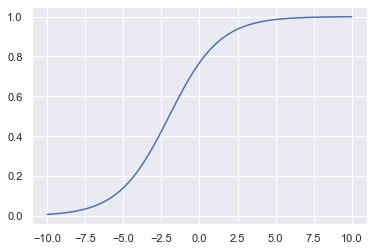

In [28]:
plt.plot(X, Y)
plt.show()

In [29]:
def sigmoid_2d (x1,x2,w1,w2,b):
    return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [30]:
W1 = 0.6   
W2 = 1.2   
b = -1 
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

In [31]:
XX1, XX2 = np.meshgrid(X1, X2)

In [32]:
Y_2d = sigmoid_2d(XX1,XX2,W1,W2,b)
print(Y_2d.shape)

(100, 100)


Text(0.5, 0, 'y')

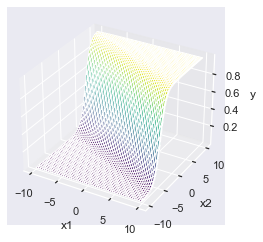

In [33]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(XX1,XX2,Y_2d,cmap = 'viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [34]:
w_rand = 0.5
b_rand = 0.5
X_rand = np.random.random(25) * 20 - 10
Y_rand = sigmoid(X_rand, w_rand, b_rand)  

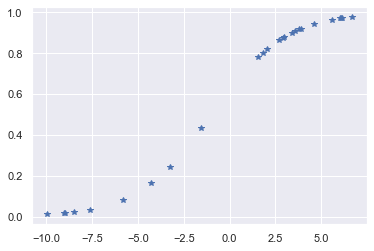

In [35]:
plt.plot(X_rand, Y_rand, '*')
plt.show()

In [37]:
def calc_loss (X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(X, w_est, b_est))**2
    return np.sum(loss)

In [38]:
W = np.linspace(-1,1, 100)
B = np.linspace(-1,1, 100)
WW , BB = np.meshgrid(W, B)

In [39]:
 inte = calc_loss(X_rand, Y_rand, WW[1,1], BB[1,1])
 type(inte)

numpy.float64

In [41]:
Loss = np.zeros(WW.shape)
for row in range(WW.shape[0]):
    for column in range(WW.shape[1]):
        Loss[row,column] = calc_loss(X_rand, Y_rand, WW[row,column], BB[row,column])

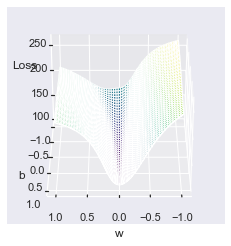

In [42]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(WW,BB,Loss,cmap = 'viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.view_init(30,90)

In [10]:
cancerVals = sklearn.datasets.load_breast_cancer()
x = cancerVals.data
y = cancerVals.target
df = pd.DataFrame(cancerVals.data, columns=cancerVals.feature_names)
df['cancer'] = cancerVals.target
label = df['cancer']
df = df.drop('cancer', axis=1)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Split into Test and Train Data

In [11]:
X_train, X_validate, Y_train, Y_validate = train_test_split(df, label, test_size=0.1, random_state=3, stratify=label)

# Class Sigmoid Neuron 

In [12]:
class SigmoidNeuronCompressed:
    def __init__ (self) :
        self.w, self.b = [0], 0
    def f ( self, x ):
        return 1.0/(1.0 + np.exp(-( np.dot(self.w,x) + self.b )))
    def grad_w_reg ( self, x, y ) :
        return (self.f(x)-y) * self.f(x) * (1-self.f(x)) * x
    def grad_b_reg ( self, x, y ) : 
        return (self.f(x)-y) * self.f(x) * (1-self.f(x))
    def grad_w_class ( self, x, y ) : 
        return self.f(x) * x      if y == 0      else ( self.f(x) - 1 ) * x
    def grad_b_class ( self, x, y ) : 
        return self.f(x)      if y == 0      else ( self.f(x) - 1 )
    def fit ( self, X_train, Y_train, epochs=1, learning_rate=1) :
        if (type(X_train) == pd.core.frame.DataFrame) : X_train, Y_train = X_train.values, Y_train.values     
        self.type_, self.w, self.b = ['class', np.zeros(X_train.shape[1]).reshape(-1,1).T, 0]      if (list(Y_train).count(0)+list(Y_train).count(1)==Y_train.shape[0])      else ['reg', np.zeros(X_train.shape[1]).reshape(-1,1).T, 0]
        for i in range(epochs) :
            dw, db = 0, 0
            for x,y in zip(X_train,Y_train):dw,db=[dw+self.grad_w_reg(x,y),db+self.grad_b_reg(x,y)] if self.type_=='reg' else[dw+self.grad_w_class(x,y),db+self.grad_b_class(x,y)]
            self.w, self.b = self.w - (learning_rate*dw) , self.b - (learning_rate*db)
    def predict ( self, X_validate, binarise=False, Threshold=-1 ) :
        X_validate, Y_pred = [X_validate.values, []]      if (type(X_validate) == pd.core.frame.DataFrame)      else [X_validate, []]
        for x in X_validate : Y_pred.append(self.f(x))   
        if binarise and self.type_=='reg' : self.threshold = Y_pred.mean      if Threshold == -1      else Threshold
        return np.array((np.array(Y_pred)>=self.threshold).astype('int').ravel() if binarise and self.type_=='reg' else Y_pred )

In [13]:
sn = SigmoidNeuronCompressed()

In [14]:
sn.fit(X_train, Y_train, epochs=250, learning_rate=0.015)

In [15]:
Y_pred_sigmoid = sn.predict(X_validate)

In [20]:
print ('Accuracy of sigmoid neuron =',accuracy_score(Y_pred_sigmoid , Y_validate)*100,'%')

Accuracy of sigmoid neuron = 94.73684210526315 %
